# Black Friday Exploration

##### [[Test Data is note included]]
##### [[Performed Visual Analytics and Model based on Train Data ]]

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
dfTrain = pd.read_csv("E:\Downlload\BlackFridayTrain.csv")

In [3]:
dfTrain

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
len(dfTrain.columns)

12

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9C9184408>,
      dtype=object)

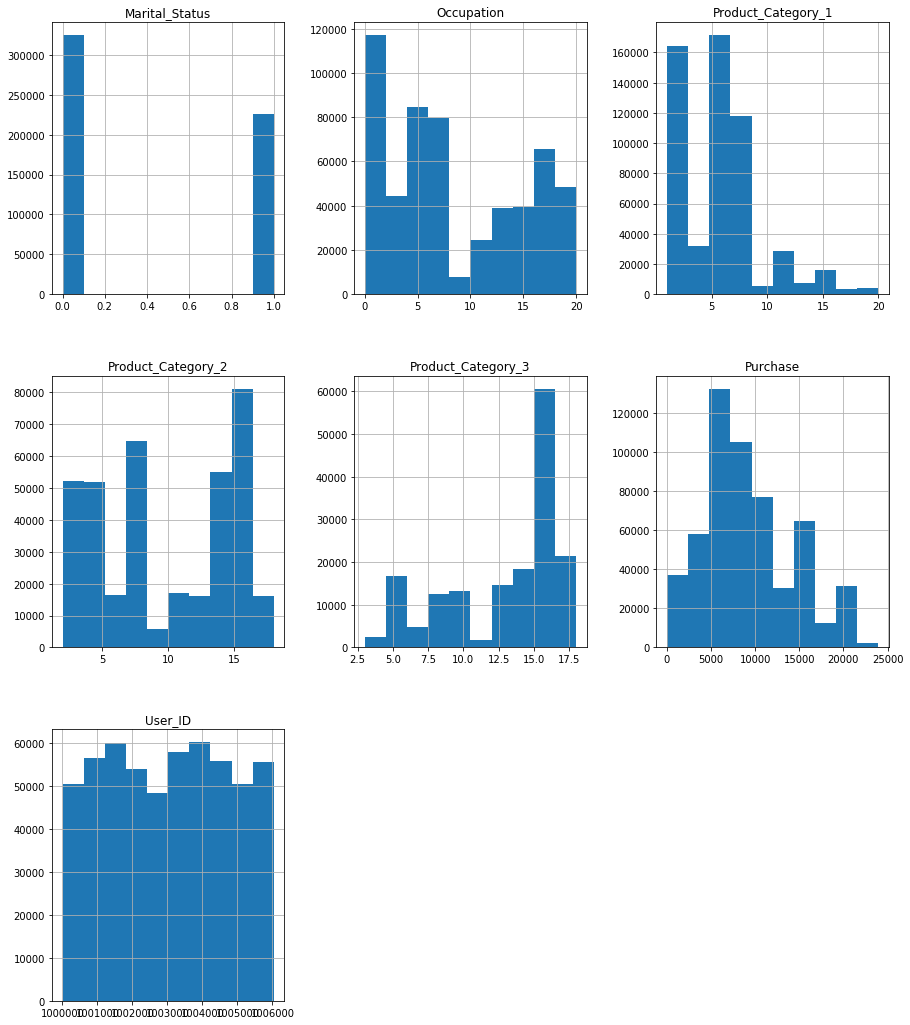

In [5]:
plt.rcParams["figure.figsize"] = 15,18
dfTrain.hist()

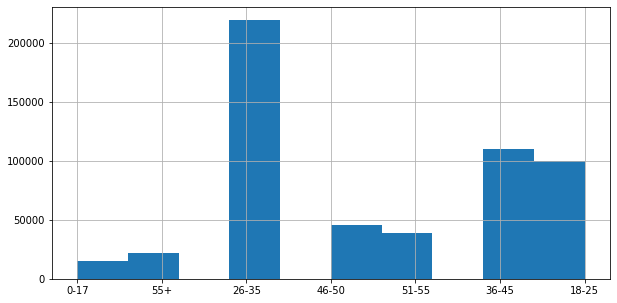

In [6]:
plt.rcParams["figure.figsize"] = 10,5
dfTrain['Age'].hist()

Text(0.5, 1.0, 'Purchase amount Distribution')

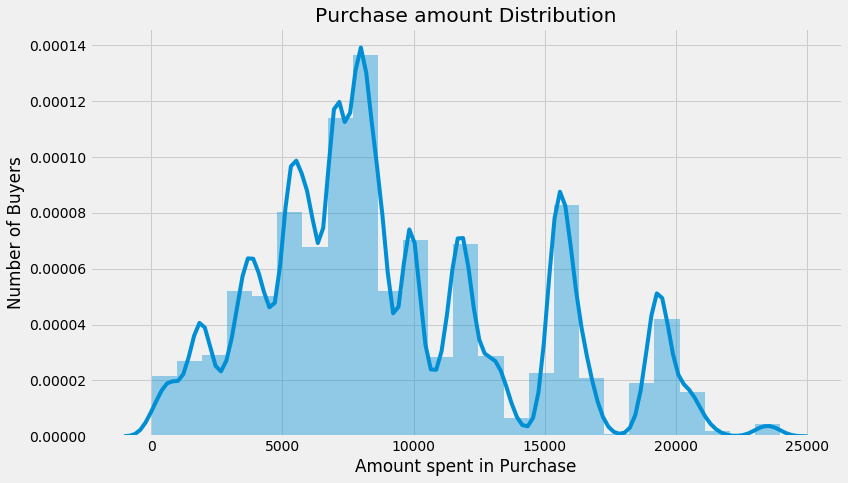

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(dfTrain.Purchase, bins = 25)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9C9D6F188>,
      dtype=object)

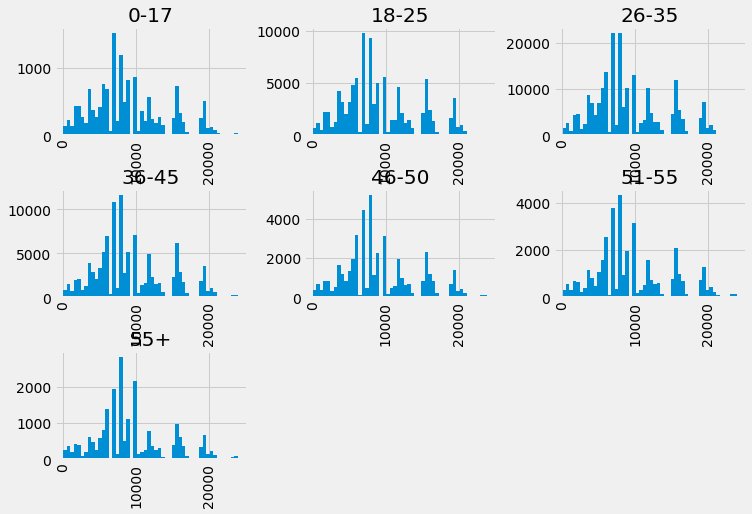

In [8]:
dfTrain.Purchase.hist(bins=50, figsize=(12,8), by=dfTrain.Age)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9C9FC5448>,
      dtype=object)

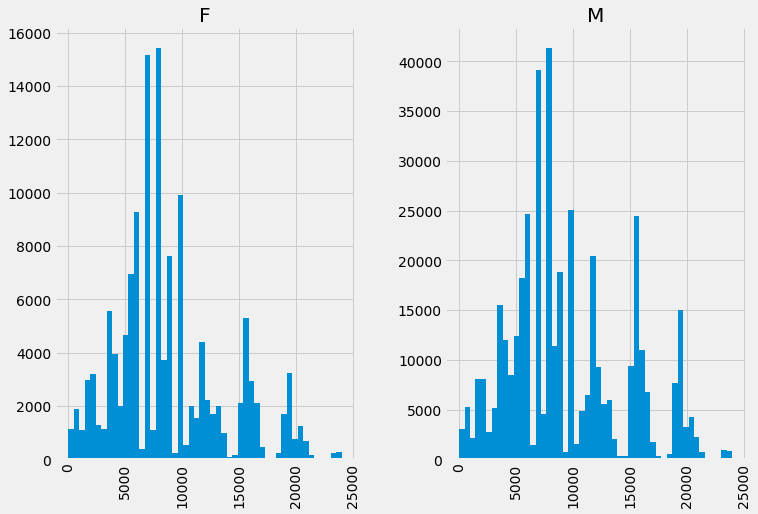

In [9]:
dfTrain.Purchase.hist(bins=50, figsize=(12,8), by=dfTrain.Gender)

In [10]:
print ('Skew is:', dfTrain.Purchase.skew())
print('Kurtosis: %f' % dfTrain.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


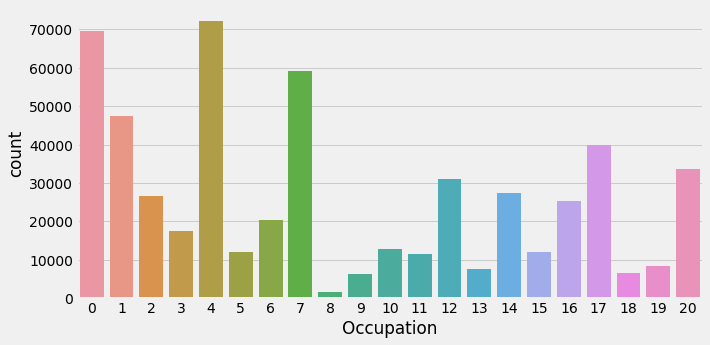

In [11]:
sns.countplot(dfTrain.Occupation)

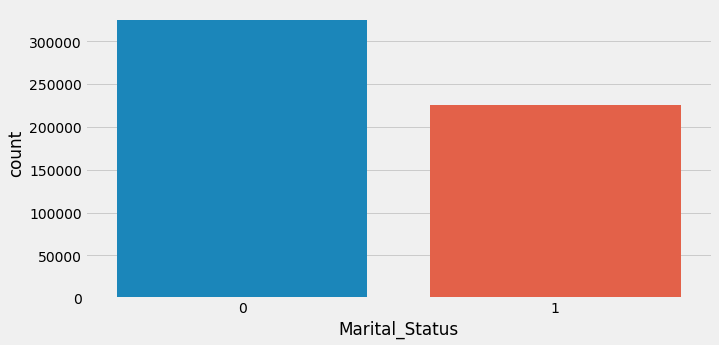

In [12]:
sns.countplot(dfTrain.Marital_Status)

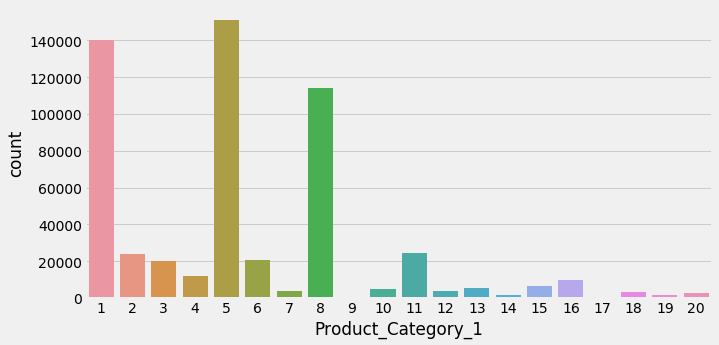

In [13]:
sns.countplot(dfTrain.Product_Category_1)

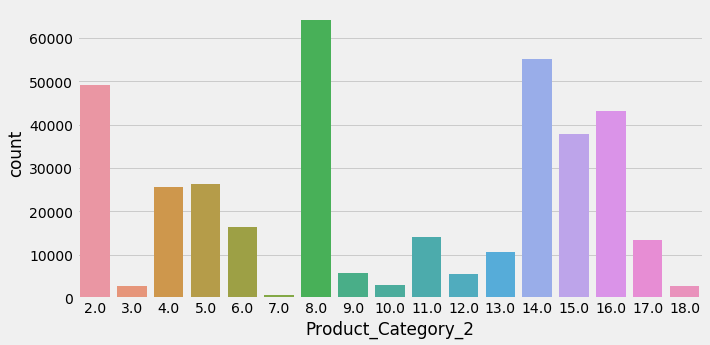

In [14]:
sns.countplot(dfTrain.Product_Category_2)

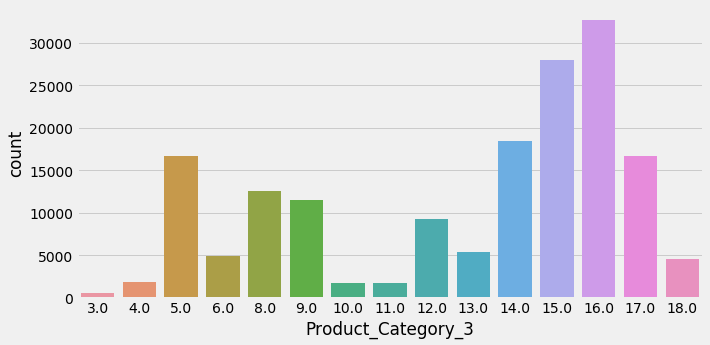

In [15]:
sns.countplot(dfTrain.Product_Category_3)

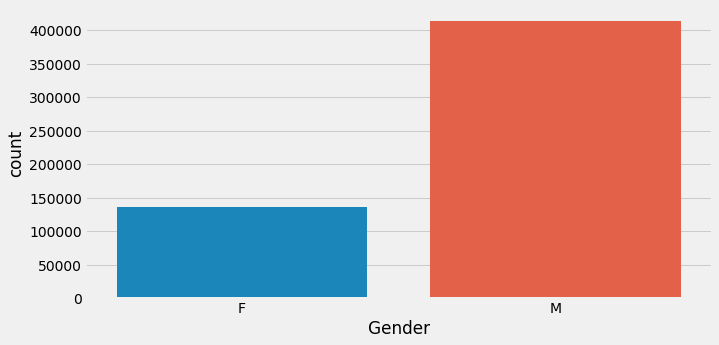

In [16]:
sns.countplot(dfTrain.Gender)

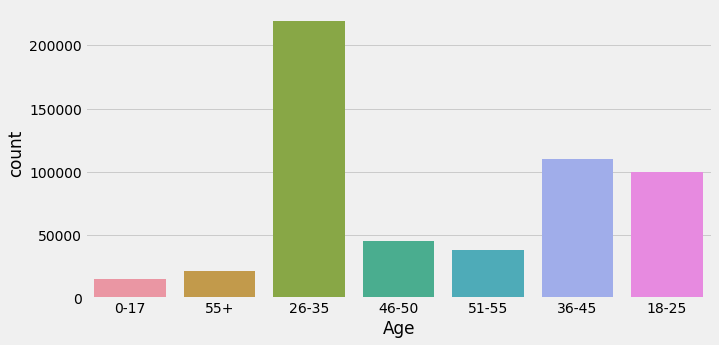

In [17]:
sns.countplot(dfTrain.Age)

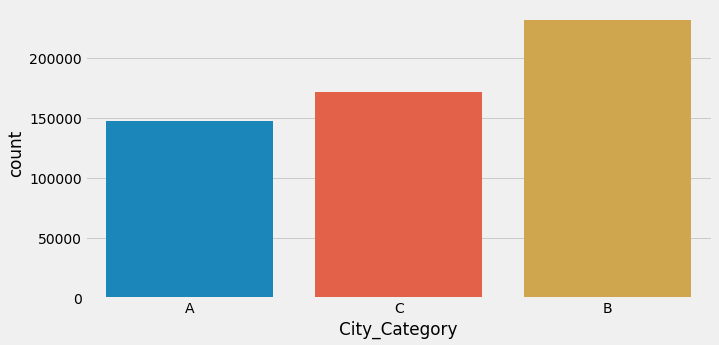

In [18]:
sns.countplot(dfTrain.City_Category)

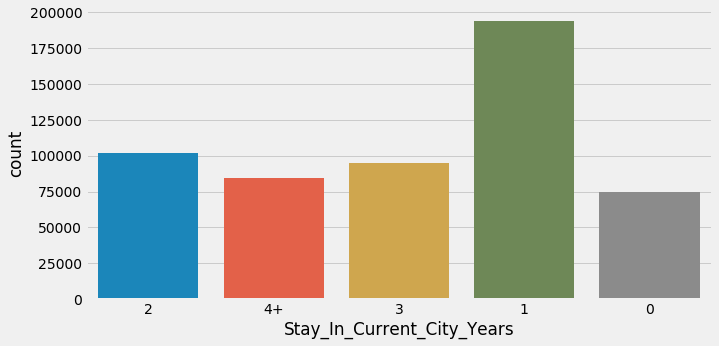

In [19]:
sns.countplot(dfTrain.Stay_In_Current_City_Years)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9CF230B88>,
      dtype=object)

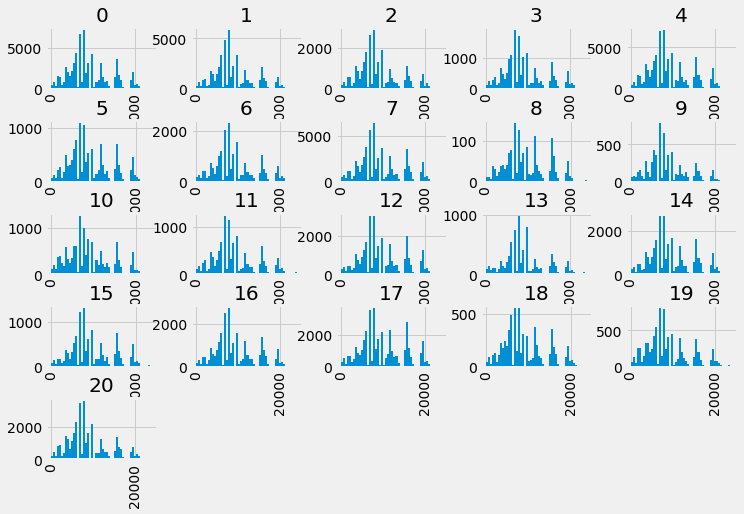

In [20]:
dfTrain.Purchase.hist(bins=50, figsize=(12,8), by=dfTrain.Occupation)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9CFC75D08>,
      dtype=object)

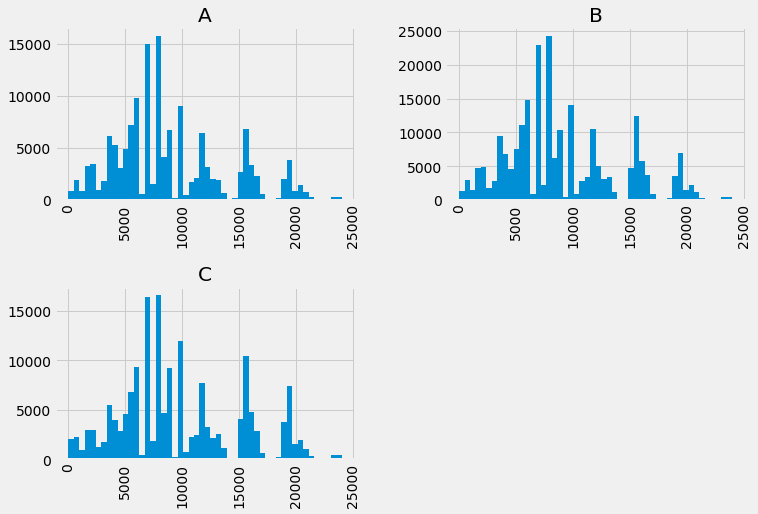

In [21]:
dfTrain.Purchase.hist(bins=50, figsize=(12,8), by=dfTrain.City_Category)

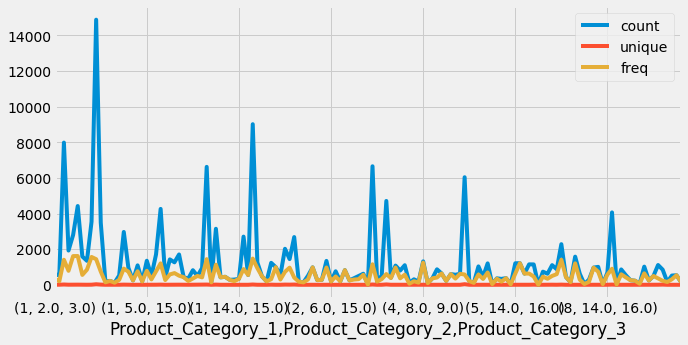

In [22]:
dfTrain.groupby(by=['Product_Category_1', 'Product_Category_2','Product_Category_3']).Product_ID.describe().plot(kind='line')

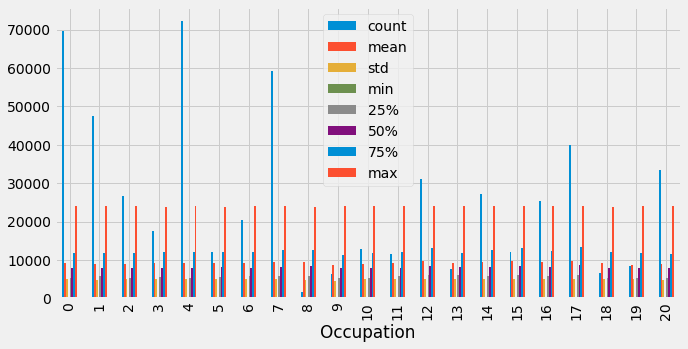

In [23]:
dfTrain.groupby('Occupation').Purchase.describe().plot(kind='bar')

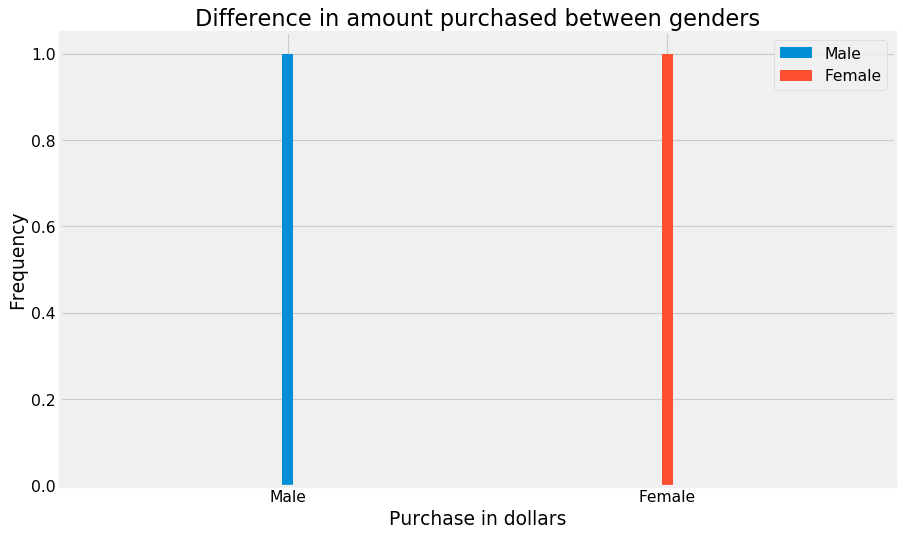

In [24]:
gender = ["Male", "Female"]

plt.figure(figsize=(12, 7), dpi= 80, facecolor='w', edgecolor='k')

plt.hist('Male', 35)
plt.hist('Female', 35)

plt.xlabel('Purchase in dollars')
plt.ylabel('Frequency')
plt.title('Difference in amount purchased between genders')
plt.legend(gender)

plt.show()

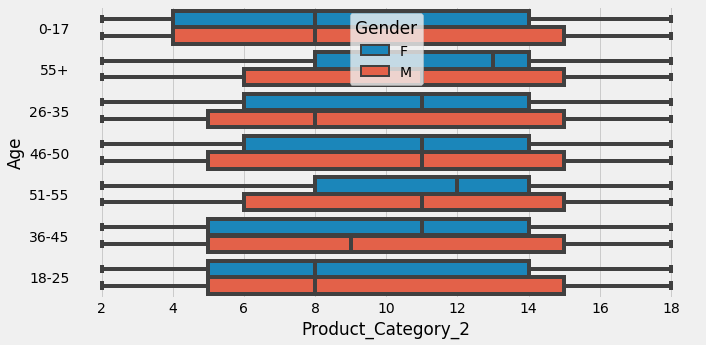

In [25]:
sns.boxplot(x=dfTrain.Product_Category_2, y=dfTrain.Age, hue=dfTrain.Gender)

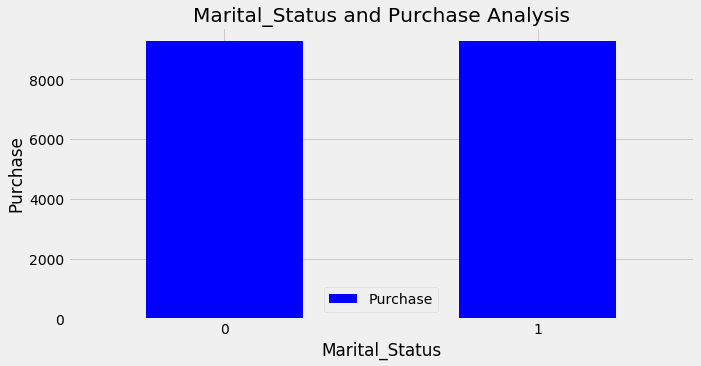

In [26]:
Occupation_pivot = \
dfTrain.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

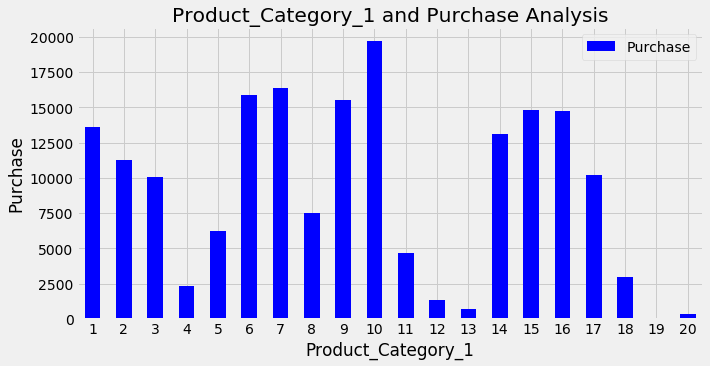

In [27]:
Occupation_pivot = \
dfTrain.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

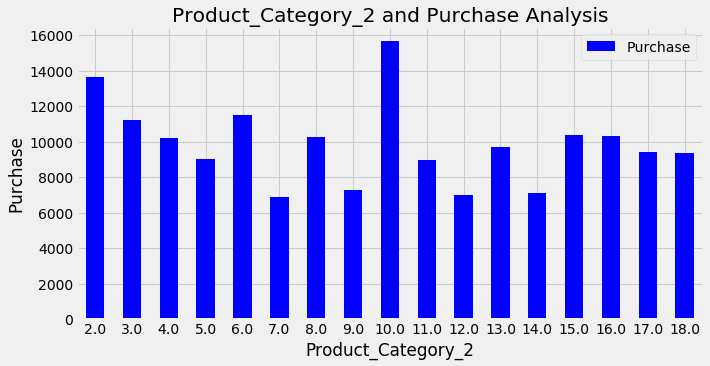

In [28]:
Occupation_pivot = \
dfTrain.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

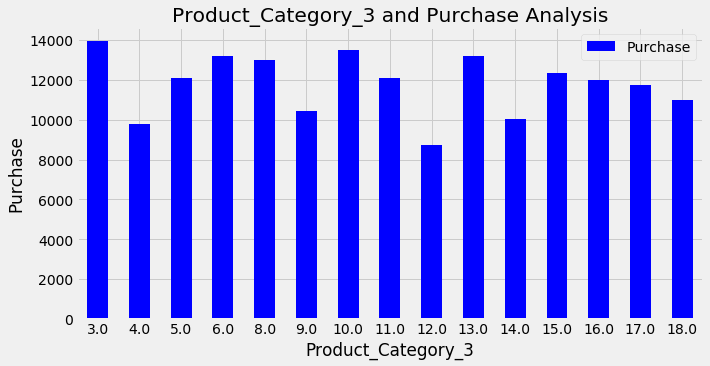

In [29]:
Occupation_pivot = \
dfTrain.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

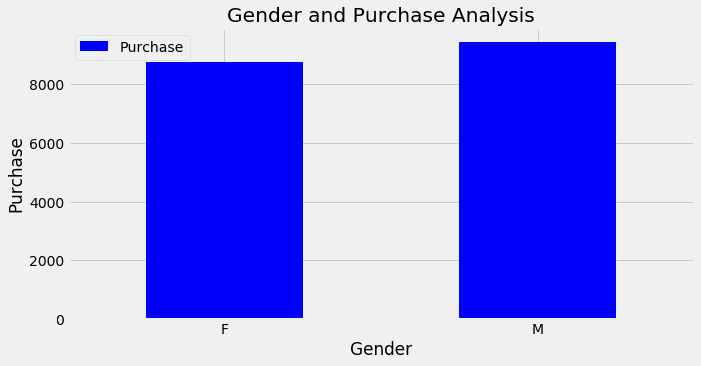

In [30]:
Occupation_pivot = \
dfTrain.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

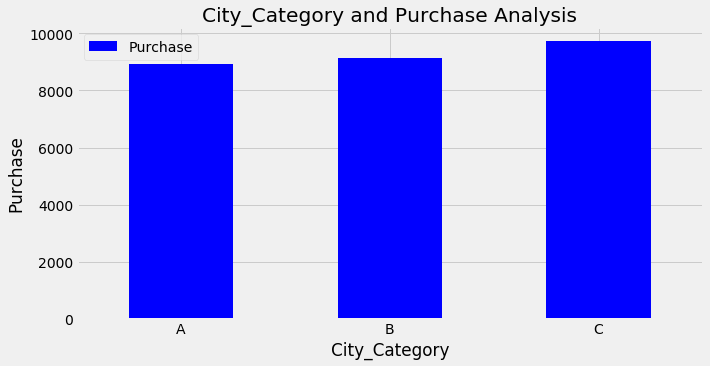

In [31]:
Occupation_pivot = \
dfTrain.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

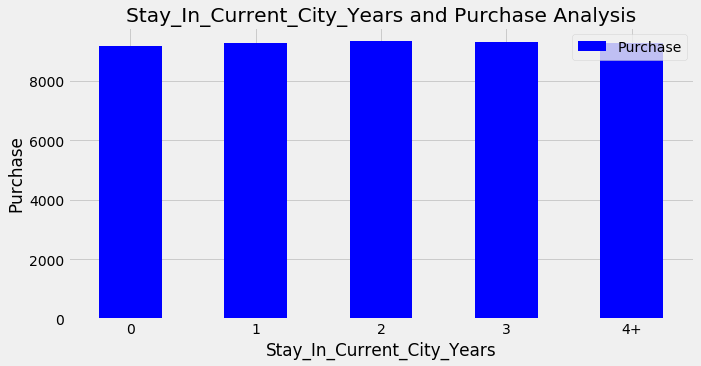

In [32]:
Occupation_pivot = \
dfTrain.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

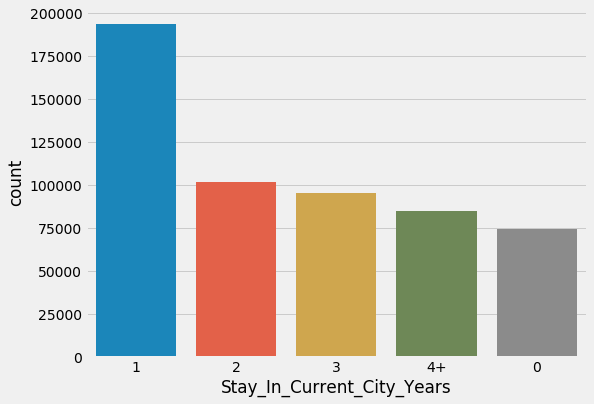

In [33]:
plt.figure(figsize=(8,6))
ordr2 =dfTrain.groupby(["Stay_In_Current_City_Years"]).count().sort_values(by='Purchase',ascending=False).index
sns.countplot(dfTrain['Stay_In_Current_City_Years'], label=True, order=ordr2)
plt.show()

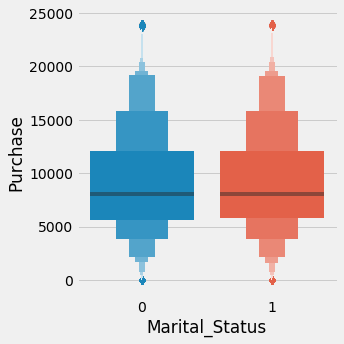

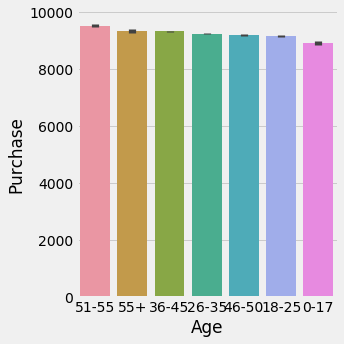

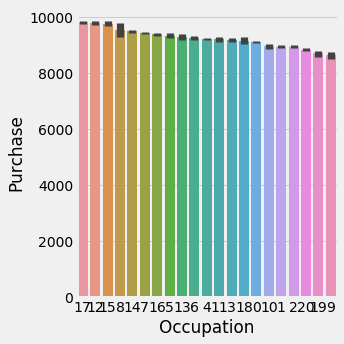

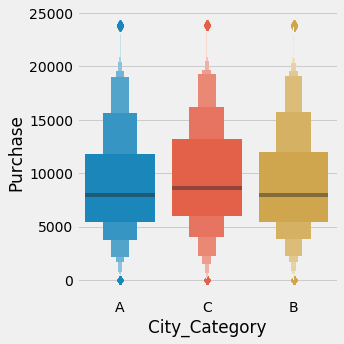

In [34]:
sns.catplot(x='Marital_Status', y='Purchase', data=dfTrain, kind='boxen')

ordr_occ =dfTrain.groupby(["Age"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Age', y='Purchase', order=ordr_occ, data=dfTrain, kind='bar')

ordr_occ =dfTrain.groupby(["Occupation"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Occupation', y='Purchase', order=ordr_occ, data=dfTrain, kind='bar')

sns.catplot(x='City_Category', y='Purchase', data=dfTrain, kind='boxen')


plt.show()

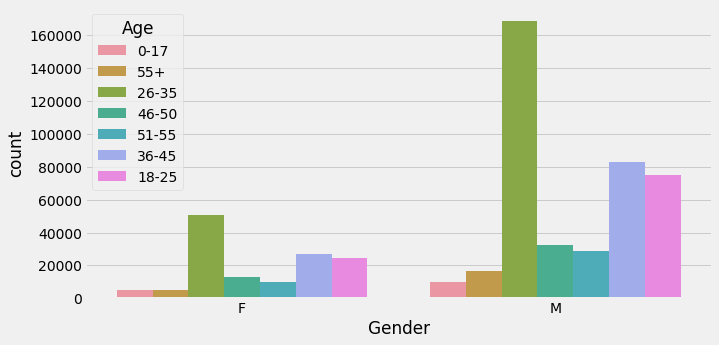

In [35]:
sns.countplot(data=dfTrain, x=dfTrain.Gender, hue=dfTrain.Age)

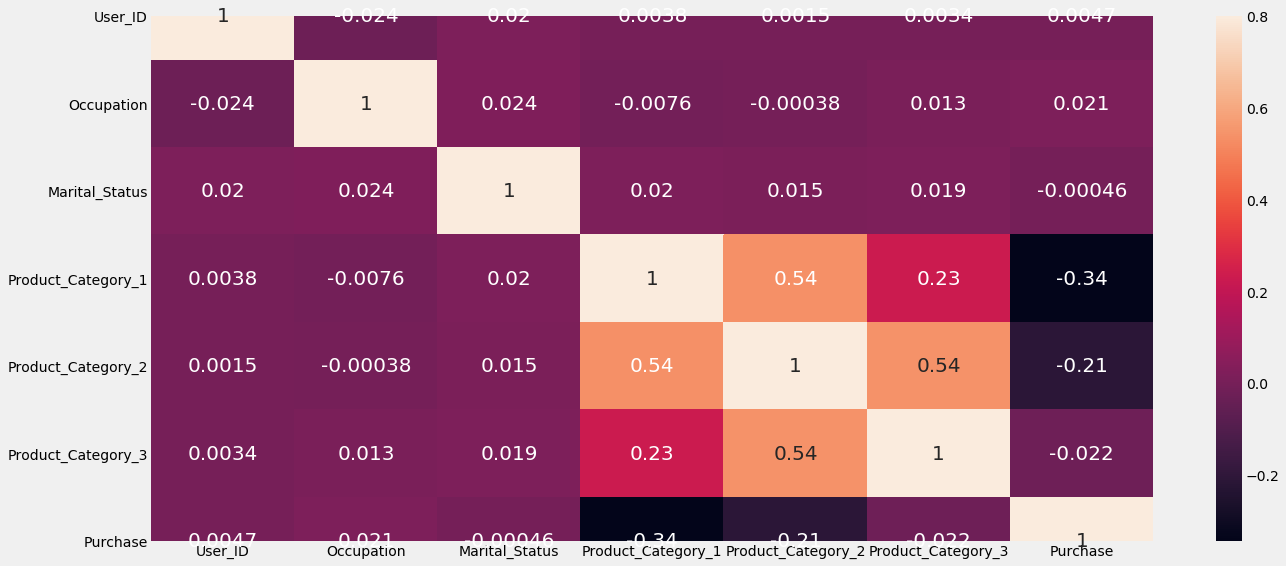

In [36]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(dfTrain.corr(), vmax=.8,annot_kws={'size': 20}, annot=True);

In [37]:
dfTrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Data Preprocessing

In [38]:
def unique(column):
    x = np.array(column)
    print(np.unique(x))

In [39]:
print("The unique ID numbers of customers occupations:")
unique(dfTrain['Occupation'])

The unique ID numbers of customers occupations:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


###### [[Applying Dict to Age]]

In [40]:
dfTrain['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [41]:
dict1 = {"0-17":0, "55+":1, "26-35":2, "46-50":3, "51-55":4, "36-45":5, "18-25":6}

In [42]:
dfTrain=dfTrain.replace({'Age':dict1})

In [43]:
dfTrain['Age'].value_counts()

2    219587
5    110013
6     99660
3     45701
4     38501
1     21504
0     15102
Name: Age, dtype: int64

# OR 

In [44]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
dfTrain['Age'] = dfTrain['Age'].apply(map_age)

###### [[Applying Dict to Gender]]

In [45]:
dfTrain['Gender'].unique()

array(['F', 'M'], dtype=object)

In [46]:
dict2 = {"F":0, "M":1}

In [47]:
dfTrain = dfTrain.replace({'Gender':dict2})

In [48]:
dfTrain['Gender'].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

# OR

In [49]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
dfTrain['Gender'] = dfTrain['Gender'].apply(map_gender)

###### [[Applying Dict to City_Category]]

In [50]:
dfTrain['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [51]:
dict3 = {"A":0, "B":1,"C":2}

In [52]:
dfTrain = dfTrain.replace({'City_Category':dict3})

In [53]:
dfTrain['City_Category'].value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

# OR

In [54]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 0
    elif city_category == 'B':
        return 1
    else:
        return 2
dfTrain['City_Category'] = dfTrain['City_Category'].apply(map_city_categories)

In [55]:
category_cols = dfTrain.select_dtypes(include=['object'])
category_cols1 = dfTrain.select_dtypes(exclude=['object'])
for col in category_cols:
    frequency = dfTrain[col].value_counts()
    print('\nThis is the frequency distribution for “ + col + “:')
    print(frequency)
for col in category_cols1:
    frequency = dfTrain[col].value_counts()
    print('\nThis is the frequency distribution for “ + col + “:')
    print(frequency)


This is the frequency distribution for “ + col + “:
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00008942       1
P00336242       1
P00013542       1
P00338242       1
P00063642       1
Name: Product_ID, Length: 3631, dtype: int64

This is the frequency distribution for “ + col + “:
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

This is the frequency distribution for “ + col + “:
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

This is the frequency distribution for “ + col + “:
1    414259
0    135809
Name: Gender, dtype: int64

This is the frequency distribution for “ + col + “:
2    219587
5    110013
6     99660
3     45701
4     38501
1     21504
0     15102
Name: Age, dtype: int64

Th

In [56]:
dfTrain

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,1,16,2,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,4,13,1,1,1,20,NaN,NaN,368
550064,1006035,P00375436,0,2,1,2,3,0,20,NaN,NaN,371
550065,1006036,P00375436,0,2,15,1,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,0,1,1,2,2,0,20,NaN,NaN,365


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()

In [59]:
dfTrain['Stay_In_Current_City_Years']=le.fit_transform(dfTrain['Stay_In_Current_City_Years'])

In [60]:
def remove_dollar(x):
    a =  x[2:] #removes first two chr
    result = ""
    for i in a:
        if i.isdigit() is True:
            result = result + i
    return result

In [61]:
dfTrain['Product_ID'] = dfTrain['Product_ID'].apply(remove_dollar)

In [62]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [63]:
#dfTrain = dfTrain.apply(lambda x:(x - min(x))/(max(x)-min(x)), axis = 0)
dfTrain = scaler.fit_transform(dfTrain)

In [64]:
dfTrain =pd.DataFrame(dfTrain)
dfTrain

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.752639,-1.028774,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,-0.610809,NaN,NaN,-0.177973
1,-1.752639,0.722139,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-0.755385,0.322825,1.181756
2,-1.752639,-0.845799,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,1.675656,NaN,NaN,-1.561193
3,-1.752639,-0.869157,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,1.675656,0.817380,NaN,-1.633858
4,-1.752061,1.077382,0.572570,-1.394247,1.214734,1.259336,1.660861,-0.833018,0.659449,NaN,NaN,-0.257805
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1.738930,1.924156,0.572570,0.310369,0.754799,-0.056090,-0.665728,1.200454,3.708069,NaN,NaN,-1.771025
550064,1.740087,1.953267,-1.746513,-0.826042,-1.084943,1.259336,0.885331,-0.833018,3.708069,NaN,NaN,-1.770428
550065,1.740666,1.953267,-1.746513,-0.826042,1.061423,-0.056090,1.660861,1.200454,3.708069,NaN,NaN,-1.817013
550066,1.741824,1.953267,-1.746513,-1.394247,-1.084943,1.259336,0.109801,-0.833018,3.708069,NaN,NaN,-1.771623


In [65]:
dfTrain =dfTrain.rename(columns={0:'UserId',1:'ProductId',2:'Gender',3:'Age',4:'Occupation',5:'City_Category',6:'Stay_In_Current_City_Years',7:'Marital_Status',8:'Product_Category_1',9:'Product_Category_2',10:'Product_Category_3',11:'Purchase'})

In [66]:
dfTrain

,UserId,ProductId,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,-1.752639,-1.028774,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,-0.610809,NaN,NaN,-0.177973
1,-1.752639,0.722139,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-0.755385,0.322825,1.181756
2,-1.752639,-0.845799,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,1.675656,NaN,NaN,-1.561193
3,-1.752639,-0.869157,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,1.675656,0.817380,NaN,-1.633858
4,-1.752061,1.077382,0.572570,-1.394247,1.214734,1.259336,1.660861,-0.833018,0.659449,NaN,NaN,-0.257805
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1.738930,1.924156,0.572570,0.310369,0.754799,-0.056090,-0.665728,1.200454,3.708069,NaN,NaN,-1.771025
550064,1.740087,1.953267,-1.746513,-0.826042,-1.084943,1.259336,0.885331,-0.833018,3.708069,NaN,NaN,-1.770428
550065,1.740666,1.953267,-1.746513,-0.826042,1.061423,-0.056090,1.660861,1.200454,3.708069,NaN,NaN,-1.817013
550066,1.741824,1.953267,-1.746513,-1.394247,-1.084943,1.259336,0.109801,-0.833018,3.708069,NaN,NaN,-1.771623


### [[Treating Missing Values]]

In [67]:
dfTrain.isna().sum()

UserId                             0
ProductId                          0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [68]:
dfTrain =dfTrain.drop(['Product_Category_2'],axis=1)

In [69]:
dfTrain =dfTrain.drop(['Product_Category_3'],axis=1)

In [70]:
dfTrain.isna().sum().sum()

0

In [71]:
dfTrain 

,UserId,ProductId,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,-1.752639,-1.028774,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,-0.610809,-0.177973
1,-1.752639,0.722139,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,-1.118912,1.181756
2,-1.752639,-0.845799,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,1.675656,-1.561193
3,-1.752639,-0.869157,-1.746513,-1.962452,0.294864,-1.371516,0.109801,-0.833018,1.675656,-1.633858
4,-1.752061,1.077382,0.572570,-1.394247,1.214734,1.259336,1.660861,-0.833018,0.659449,-0.257805
...,...,...,...,...,...,...,...,...,...,...
550063,1.738930,1.924156,0.572570,0.310369,0.754799,-0.056090,-0.665728,1.200454,3.708069,-1.771025
550064,1.740087,1.953267,-1.746513,-0.826042,-1.084943,1.259336,0.885331,-0.833018,3.708069,-1.770428
550065,1.740666,1.953267,-1.746513,-0.826042,1.061423,-0.056090,1.660861,1.200454,3.708069,-1.817013
550066,1.741824,1.953267,-1.746513,-1.394247,-1.084943,1.259336,0.109801,-0.833018,3.708069,-1.771623


# Train Test Spli

In [72]:
x= dfTrain.drop(['Purchase'],axis=1)
y= dfTrain['Purchase']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Feature Selection

In [75]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [76]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42)) 
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [77]:
feature_sel_model.get_support()

array([False,  True,  True, False,  True,  True, False, False,  True])

In [78]:
x_train = x_train.drop(['Age','Stay_In_Current_City_Years'],axis=1)
x_test = x_test.drop(['Age','Stay_In_Current_City_Years'],axis=1)

In [79]:
x_train

,UserId,ProductId,Gender,Occupation,City_Category,Marital_Status,Product_Category_1
500304,1.167614,0.343537,0.572570,1.214734,-1.371516,-0.833018,0.659449
16861,-0.232603,0.864236,0.572570,-1.084943,-0.056090,1.200454,2.691862
113230,1.419988,-1.105662,0.572570,-0.165072,-1.371516,-0.833018,0.659449
434978,-1.168589,-0.462331,0.572570,-1.238255,-1.371516,-0.833018,-1.118912
385516,1.336056,-1.140700,-1.746513,-0.778319,1.259336,1.200454,-0.610809
...,...,...,...,...,...,...,...
110268,1.136935,-1.305182,0.572570,1.368046,1.259336,-0.833018,-0.102705
259178,0.516417,-1.481344,0.572570,0.908111,1.259336,1.200454,-0.102705
365838,-0.449668,1.404401,-1.746513,-1.084943,-0.056090,-0.833018,-0.102705
131932,-0.446774,-1.683784,-1.746513,-0.625007,-0.056090,-0.833018,0.659449


# Model Building

## Random Forest Model

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
regressor = RandomForestRegressor(n_estimators=100,max_depth=7,min_samples_split=4,min_samples_leaf=2,random_state=42)

In [82]:
reg=regressor.fit(x_train,y_train)

In [83]:
y_pred1=regressor.predict(x_test)

In [84]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [85]:
print('Root Mean SQUARED ERROR   =  ',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

Root Mean SQUARED ERROR   =   0.5820157422125848


In [86]:
r2_score(y_test, y_pred1)

0.6608697045413231

# XGboost Model

In [87]:
from xgboost import XGBRegressor

In [88]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.18, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [89]:
xgb.fit(x_train,y_train)

[14:12:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.18, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [90]:
preds = xgb.predict(x_test)

In [91]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [92]:
print('Root Mean SQUARED ERROR   =  ',np.sqrt(metrics.mean_squared_error(y_test,preds)))

Root Mean SQUARED ERROR   =   0.5032339420359148


In [93]:
r2_score(y_test, preds)

0.7464655515257944